# Analysis of Well Performance in the Oil and Gas Sector

## Project Scope
This study analyzes geological features and spatial data to provide insights that enhance productivity and forecasting in oil and gas well performance, supporting strategic decision-making within the industry.

## Core Analysis and Results

### Geological Impact Study
- **Objective:** Evaluate how geological characteristics influence well performance to guide investment and operational strategies.
- **Methodology:** Production data from the Wolfcamp formations were analyzed, focusing on key performance indicators such as production volumes and operational efficiency.
- **Key Finding:** A significant correlation between geological features like porosity and permeability with production efficiency, indicating their critical role in well productivity.

### Spatial Data Analysis
- **Objective:** Assess the accuracy of production forecasts through spatial analysis of well locations.
- **Methodology:** Spatial clustering techniques were applied to identify patterns in productivity based on geographic coordinates.
- **Key Finding:** Diverse productivity levels were identified across clusters; notably, Cluster 4 exhibited higher productivity due to favorable geological conditions and proximity to infrastructure.

## Strategic Conclusions

- Aligning operational strategies with geological and spatial characteristics can significantly influence well performance.
- Strategic site selection, informed by detailed geological and spatial analysis, can markedly impact production efficiency and economic outcomes.

## Conclusion

This analysis highlights the importance of incorporating geological and spatial data into the strategic planning processes within the oil and gas industry. By understanding the specific geological and spatial contexts of wells, companies can improve forecasting accuracy and operational efficiency, optimizing economic returns.



In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Basic libraries to manipulate data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Specify the path to the datasets
data_path = "./data/"  

# Specify the filename of the dataset
production_data = "production.csv"
meta_data = "metadata.csv"

# Read the CSV file and create a backup copy
production_df_data = pd.read_csv(data_path + production_data)
production_df = production_df_data.copy()

# Read the CSV file and create a backup copy
metadata_df_data = pd.read_csv(data_path + meta_data)
metadata_df = metadata_df_data.copy()

# Display basic info
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863 entries, 0 to 2862
Columns: 505 entries, API_UWI to EURPP_MBOEPer1000FT
dtypes: float64(397), int64(7), object(101)
memory usage: 11.0+ MB


In [3]:
# Select relevant columns from metadata and production DataFrames for analysis

metadata_columns = [
    'API_UWI',  # Unique identifier for wells
    'WellName',  # Name of the well
    'StateProvince',  # State where the well is located
    'County',  # County where the well is located
    'ENVOperator',  # Operator name
    'ENVProdWellType',  # Well classification (oil or gas)
    'Trajectory',  # Well trajectory (horizontal or vertical)
    'FirstProdDate',  # Date of first production
    'Latitude',  # Latitude of the wellbore surface hole
    'Longitude',  # Longitude of the wellbore surface hole
    'TVD_FT',  # True vertical depth
    'MD_FT',  # Measured depth from the surface along the wellbore to the bottom hole
    'ENVInterval',  # Geological formation
    'Field',  # Field where the well is located
    'LateralLength_FT',  # Length of the horizontal portion of the well
    'FracStages',  # Number of fracturing stages
    'Proppant_LBS',  # Total proppant used in the completion
    'TotalWaterPumped_GAL',  # Total water used in the completion
    'PeakProductionDate',  # Date of peak production
    'MonthsToPeakProduction',  # Months to reach peak production
    'CumProd_BOE',  # Cumulative production in Barrels of Oil Equivalent
    'CumOil_BBL',  # Cumulative oil production in barrels
    'CumGas_MCF',  # Cumulative gas production in thousand cubic feet
    'CumWater_BBL',  # Cumulative water production in barrels
    'TotalProducingMonths',  # Total number of months the well has been producing
    'LastProducingMonth'  # Last month of production recorded
]

production_columns = ['API_UWI', 'ProducingMonth', 'TotalProdMonths', 'Prod_BOE', 'Prod_MCFE', 'LiquidsProd_BBL', 'GasProd_MCF', 'WaterProd_BBL', 'CumProd_MCFE', 'CumLiquids_BBL']

# Create new DataFrames with selected columns only
metadata_df_selected = metadata_df[metadata_columns]
production_df_selected = production_df[production_columns]

# Merge the selected metadata and production data on 'API_UWI' to create a combined DataFrame
merged_df = pd.merge(production_df_selected, metadata_df_selected, on='API_UWI', how='inner')


In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107381 entries, 0 to 107380
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   API_UWI                 107381 non-null  object 
 1   ProducingMonth          107381 non-null  object 
 2   TotalProdMonths         107381 non-null  int64  
 3   Prod_BOE                107381 non-null  int64  
 4   Prod_MCFE               107381 non-null  int64  
 5   LiquidsProd_BBL         107381 non-null  int64  
 6   GasProd_MCF             107381 non-null  int64  
 7   WaterProd_BBL           107381 non-null  int64  
 8   CumProd_MCFE            107381 non-null  int64  
 9   CumLiquids_BBL          107381 non-null  int64  
 10  WellName                107381 non-null  object 
 11  StateProvince           107381 non-null  object 
 12  County                  107381 non-null  object 
 13  ENVOperator             107381 non-null  object 
 14  ENVProdWellType     

In [5]:
# Display null values in merged_df
merged_df.isnull().sum()

API_UWI                       0
ProducingMonth                0
TotalProdMonths               0
Prod_BOE                      0
Prod_MCFE                     0
LiquidsProd_BBL               0
GasProd_MCF                   0
WaterProd_BBL                 0
CumProd_MCFE                  0
CumLiquids_BBL                0
WellName                      0
StateProvince                 0
County                        0
ENVOperator                   0
ENVProdWellType               0
Trajectory                    0
FirstProdDate                 0
Latitude                      0
Longitude                     0
TVD_FT                       63
MD_FT                      1437
ENVInterval                   0
Field                         0
LateralLength_FT              0
FracStages                44847
Proppant_LBS               3111
TotalWaterPumped_GAL       3696
PeakProductionDate          802
MonthsToPeakProduction      802
CumProd_BOE                 802
CumOil_BBL                  802
CumGas_M

In [6]:
# Ensure 'FracStages' is a float for median calculation
merged_df['FracStages'] = merged_df['FracStages'].astype(float)

# Calculate the median 'FracStages' for each 'County'
median_frac_stages_per_county = merged_df.groupby('County')['FracStages'].median()

# Apply the imputation for 'FracStages'
merged_df['FracStages'] = merged_df.groupby('County')['FracStages'].transform(lambda x: x.fillna(x.median()))

# If the median is NaN (all values in the group are missing), fill with the overall median
overall_median = merged_df['FracStages'].median()
merged_df['FracStages'] = merged_df['FracStages'].fillna(overall_median)

# Now, apply median imputation for 'Proppant_LBS' and 'TotalWaterPumped_GAL'
merged_df['Proppant_LBS'] = merged_df['Proppant_LBS'].fillna(merged_df['Proppant_LBS'].median())
merged_df['TotalWaterPumped_GAL'] = merged_df['TotalWaterPumped_GAL'].fillna(merged_df['TotalWaterPumped_GAL'].median())

# Check the number of missing values for 'FracStages', 'Proppant_LBS', and 'TotalWaterPumped_GAL' to confirm imputation
print(merged_df[['FracStages', 'Proppant_LBS', 'TotalWaterPumped_GAL']].isnull().sum())


FracStages              0
Proppant_LBS            0
TotalWaterPumped_GAL    0
dtype: int64


In [7]:
merged_df.isnull().sum()

API_UWI                      0
ProducingMonth               0
TotalProdMonths              0
Prod_BOE                     0
Prod_MCFE                    0
LiquidsProd_BBL              0
GasProd_MCF                  0
WaterProd_BBL                0
CumProd_MCFE                 0
CumLiquids_BBL               0
WellName                     0
StateProvince                0
County                       0
ENVOperator                  0
ENVProdWellType              0
Trajectory                   0
FirstProdDate                0
Latitude                     0
Longitude                    0
TVD_FT                      63
MD_FT                     1437
ENVInterval                  0
Field                        0
LateralLength_FT             0
FracStages                   0
Proppant_LBS                 0
TotalWaterPumped_GAL         0
PeakProductionDate         802
MonthsToPeakProduction     802
CumProd_BOE                802
CumOil_BBL                 802
CumGas_MCF                 802
CumWater

In [8]:
merged_df = merged_df.dropna()

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105079 entries, 0 to 107380
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   API_UWI                 105079 non-null  object 
 1   ProducingMonth          105079 non-null  object 
 2   TotalProdMonths         105079 non-null  int64  
 3   Prod_BOE                105079 non-null  int64  
 4   Prod_MCFE               105079 non-null  int64  
 5   LiquidsProd_BBL         105079 non-null  int64  
 6   GasProd_MCF             105079 non-null  int64  
 7   WaterProd_BBL           105079 non-null  int64  
 8   CumProd_MCFE            105079 non-null  int64  
 9   CumLiquids_BBL          105079 non-null  int64  
 10  WellName                105079 non-null  object 
 11  StateProvince           105079 non-null  object 
 12  County                  105079 non-null  object 
 13  ENVOperator             105079 non-null  object 
 14  ENVProdWellType         1

In [10]:
# Check for and drop duplicate rows, if any
merged_df = merged_df.drop_duplicates()

# Convert date columns to datetime format
date_columns = ['ProducingMonth', 'FirstProdDate', 'PeakProductionDate', 'LastProducingMonth']
for col in date_columns:
    merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')  # Assuming the date format is identifiable by pandas

# Check the conversions and number of NaT values
for col in date_columns:
    print(f"{col} - NaT values: {merged_df[col].isna().sum()}")

# Convert categorical columns to category type, including the geological formation 'ENVInterval'
categorical_columns = ['StateProvince', 'County', 'ENVOperator', 'ENVProdWellType', 'Trajectory', 'ENVInterval']
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

# Display the updated dataframe info to confirm changes
merged_df.info()



ProducingMonth - NaT values: 0
FirstProdDate - NaT values: 0
PeakProductionDate - NaT values: 0
LastProducingMonth - NaT values: 0
<class 'pandas.core.frame.DataFrame'>
Index: 105079 entries, 0 to 107380
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   API_UWI                 105079 non-null  object        
 1   ProducingMonth          105079 non-null  datetime64[ns]
 2   TotalProdMonths         105079 non-null  int64         
 3   Prod_BOE                105079 non-null  int64         
 4   Prod_MCFE               105079 non-null  int64         
 5   LiquidsProd_BBL         105079 non-null  int64         
 6   GasProd_MCF             105079 non-null  int64         
 7   WaterProd_BBL           105079 non-null  int64         
 8   CumProd_MCFE            105079 non-null  int64         
 9   CumLiquids_BBL          105079 non-null  int64         
 10  WellName                10

In [11]:
# Check data types of all columns
print(merged_df.info())

# Inspect the first few rows of date columns to ensure correct conversion
print(merged_df[date_columns].head())

# Check for NaT values in date columns which might indicate parsing errors
for col in date_columns:
    print(f"Missing values in {col}: {merged_df[col].isna().sum()}")

# Validate categorical columns by printing the categories and first few rows
for col in categorical_columns:
    print(f"Categories in {col}: {merged_df[col].cat.categories}")
    print(merged_df[col].head())


<class 'pandas.core.frame.DataFrame'>
Index: 105079 entries, 0 to 107380
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   API_UWI                 105079 non-null  object        
 1   ProducingMonth          105079 non-null  datetime64[ns]
 2   TotalProdMonths         105079 non-null  int64         
 3   Prod_BOE                105079 non-null  int64         
 4   Prod_MCFE               105079 non-null  int64         
 5   LiquidsProd_BBL         105079 non-null  int64         
 6   GasProd_MCF             105079 non-null  int64         
 7   WaterProd_BBL           105079 non-null  int64         
 8   CumProd_MCFE            105079 non-null  int64         
 9   CumLiquids_BBL          105079 non-null  int64         
 10  WellName                105079 non-null  object        
 11  StateProvince           105079 non-null  category      
 12  County                  105079 non-

In [12]:
# Calculate the number of unique values in each column
unique_values_per_column = merged_df.nunique()

# Display the result
print(unique_values_per_column)

API_UWI                     2718
ProducingMonth               177
TotalProdMonths              175
Prod_BOE                   33567
Prod_MCFE                  74811
LiquidsProd_BBL            26653
GasProd_MCF                49495
WaterProd_BBL              48028
CumProd_MCFE              102451
CumLiquids_BBL             93344
WellName                    2718
StateProvince                  1
County                         2
ENVOperator                   20
ENVProdWellType                2
Trajectory                     1
FirstProdDate                114
Latitude                    2047
Longitude                   2612
TVD_FT                      1690
MD_FT                       2259
ENVInterval                    3
Field                         82
LateralLength_FT            1860
FracStages                    72
Proppant_LBS                2563
TotalWaterPumped_GAL        2558
PeakProductionDate           111
MonthsToPeakProduction        17
CumProd_BOE                 2713
CumOil_BBL

# Exploratory Data Analysis

### 1. Average Time to Peak Production by Year
This graph illustrates the overall trend in operational efficiency over time, showcasing how advancements in technology and changes in operational strategies have potentially reduced the time it takes for wells to reach peak production. A decreasing trend would suggest significant improvements in drilling and production techniques, reflecting the industry's evolution towards faster productivity.


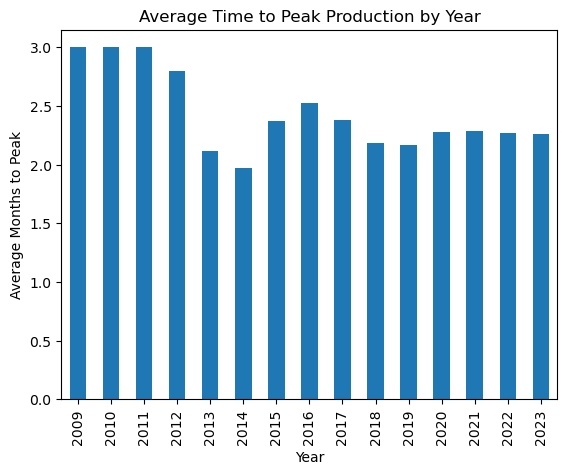

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create 'Year' from 'ProducingMonth' column
merged_df['Year'] = merged_df['ProducingMonth'].dt.year

# Now you can group by 'Year' and calculate the mean 'MonthsToPeakProduction'
merged_df.groupby('Year')['MonthsToPeakProduction'].mean().plot(kind='bar')
plt.title('Average Time to Peak Production by Year')
plt.ylabel('Average Months to Peak')
plt.xlabel('Year')
plt.show()

### 2. Time to Peak Production by Geological Formation
Here, we explore how geological formations impact the time it takes for wells to reach peak production. Consistent median times across formations with some variations and outliers suggest a complex interplay between geology and operational practices. This graph highlights the importance of geological characteristics in influencing production efficiency.


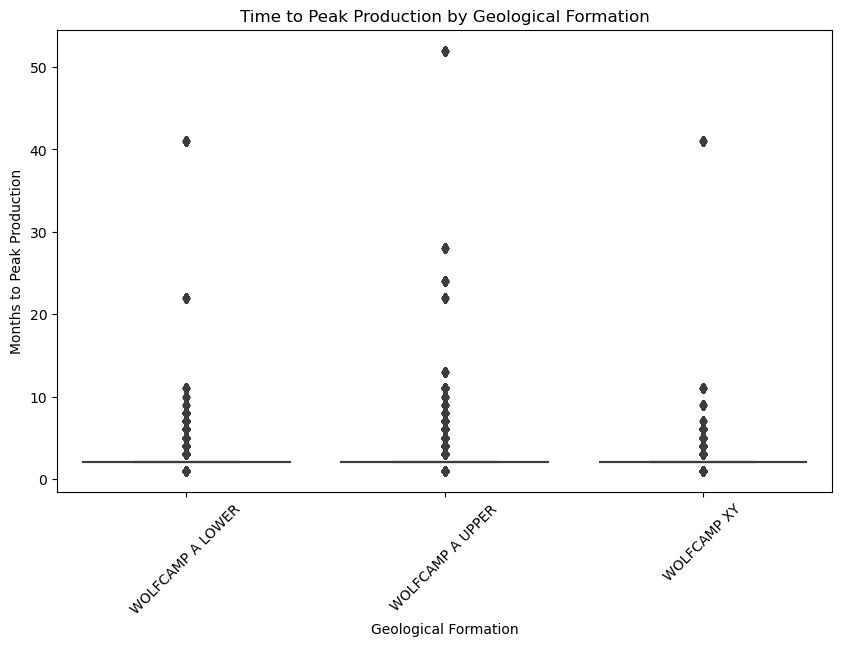

In [14]:
# Time to Peak Production across Geological Formations
plt.figure(figsize=(10, 6))
sns.boxplot(x='ENVInterval', y='MonthsToPeakProduction', data=merged_df)
plt.xticks(rotation=45)
plt.title('Time to Peak Production by Geological Formation')
plt.ylabel('Months to Peak Production')
plt.xlabel('Geological Formation')
plt.show()

### 3. Cumulative Production by Geological Formation
This graph compares the cumulative production, measured in barrels of oil equivalent (BOE), across different geological formations. By showcasing variations in productivity, it underlines the significance of geological formations on well performance, with particular attention to formations that exhibit higher median cumulative production, indicative of reservoir quality and operational efficacy.


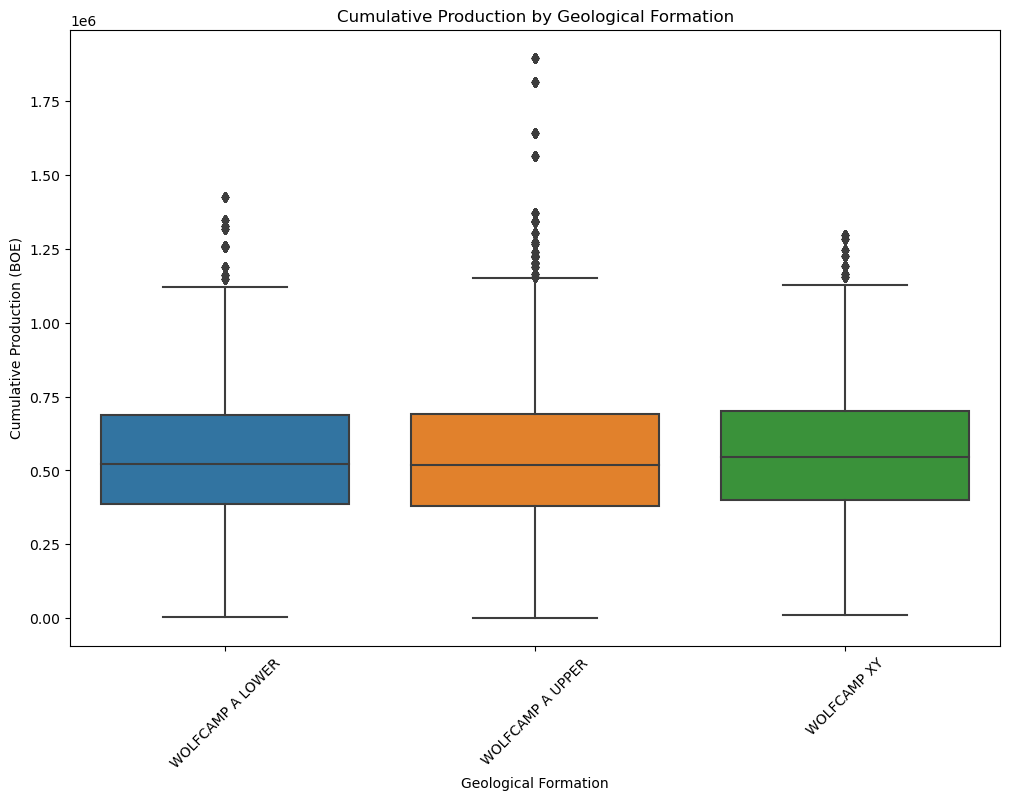

In [15]:
# Production by Geological Formation
plt.figure(figsize=(12, 8))
sns.boxplot(x='ENVInterval', y='CumProd_BOE', data=merged_df)
plt.xticks(rotation=45)
plt.title('Cumulative Production by Geological Formation')
plt.ylabel('Cumulative Production (BOE)')
plt.xlabel('Geological Formation')
plt.show()

### 4. Development of Wells Over Time by Geological Formation
Illustrating the trends in well development across different geological formations over time, this graph reflects strategic shifts in exploration and development efforts. An increase in well development, particularly between 2014 and 2020, followed by a recent decline, may indicate market, technological, or regulatory influences on exploration activities.

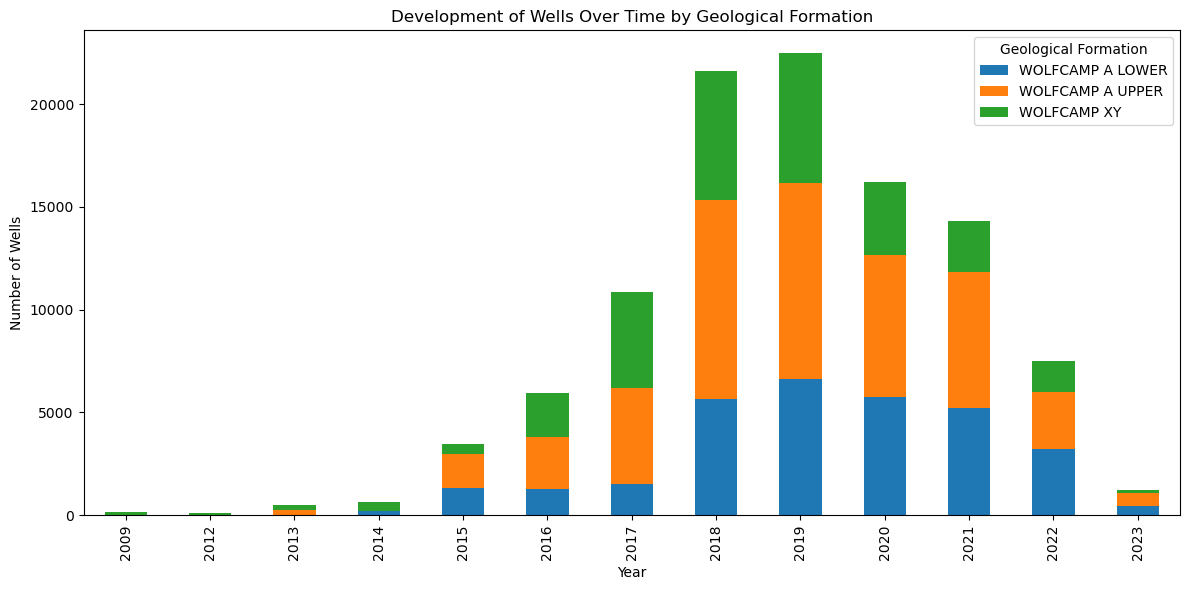

In [16]:
# Create a new column for the year
merged_df['Year'] = merged_df['FirstProdDate'].dt.year

# Create a pivot table to count the number of wells started each year for each geological formation
pivot_table = merged_df.pivot_table(index='Year', columns='ENVInterval', aggfunc='size', fill_value=0)

# Plotting the development of wells over time for each geological formation
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Development of Wells Over Time by Geological Formation')
plt.xlabel('Year')
plt.ylabel('Number of Wells')
plt.legend(title='Geological Formation')
plt.tight_layout() # Adjust the layout
plt.show()

### 5. Cumulative Oil and Gas Production by County
Focusing on the spatial aspect of production, this graph presents the total volumes of oil and gas produced in different counties. It reveals the contrast in production volumes between counties, hinting at underlying differences in reservoir potentials, number of wells, and possibly, the efficiency of production techniques employed in these areas.


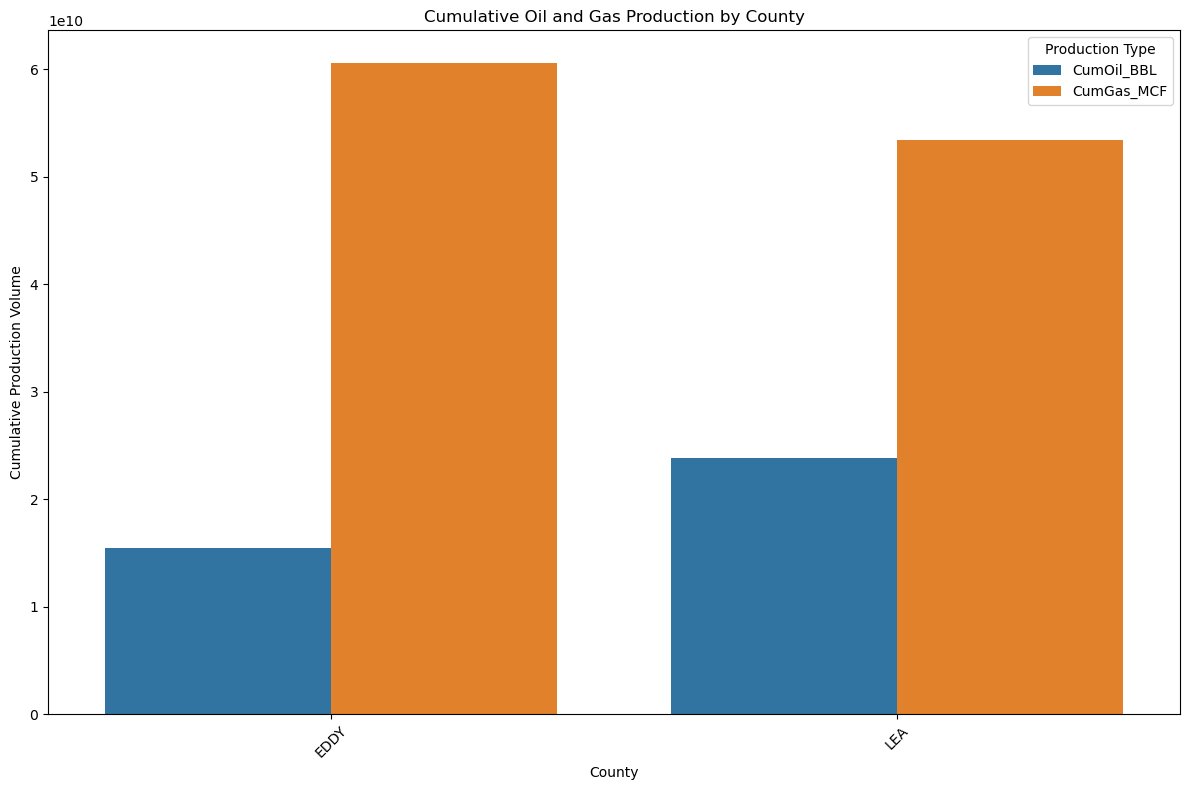

In [17]:
# Grouping data by 'County' and summing up 'CumOil_BBL' and 'CumGas_MCF' for cumulative production
county_oil_gas_production = merged_df.groupby('County').agg({'CumOil_BBL': 'sum', 'CumGas_MCF': 'sum'}).reset_index()

# Melting the DataFrame for easier plotting with seaborn
melted_data = county_oil_gas_production.melt(id_vars=['County'], value_vars=['CumOil_BBL', 'CumGas_MCF'],
                                             var_name='ProductionType', value_name='CumulativeProduction')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='County', y='CumulativeProduction', hue='ProductionType', data=melted_data)
plt.xticks(rotation=45)
plt.title('Cumulative Oil and Gas Production by County')
plt.ylabel('Cumulative Production Volume')
plt.xlabel('County')
plt.legend(title='Production Type')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

### 6. Well Age vs. Cumulative Oil Production (BOE)
This analysis investigates the relationship between the age of wells and their cumulative oil production. A wide range of production values across different well ages suggests that age alone is not a definitive predictor of a well's productivity. Factors such as reservoir characteristics, completion methods, and operational strategies likely play a more significant role.


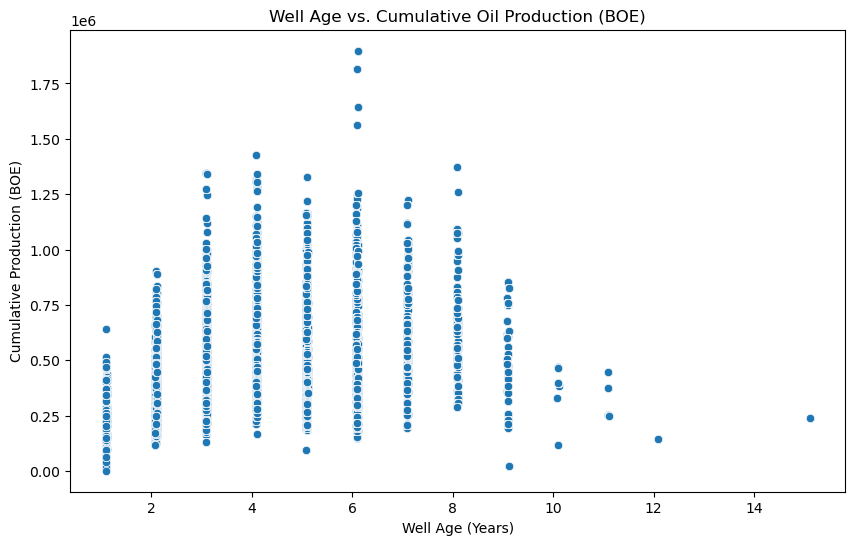

In [18]:
# Assuming 'FirstProdDate' and 'LastProducingMonth' are in the correct datetime format
merged_df['WellAge'] = (pd.to_datetime('today') - merged_df['FirstProdDate']).dt.days / 365.25

# Scatter Plot: Well Age vs. Cumulative Oil Production (BOE)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='WellAge', y='CumProd_BOE', data=merged_df)
plt.title('Well Age vs. Cumulative Oil Production (BOE)')
plt.xlabel('Well Age (Years)')
plt.ylabel('Cumulative Production (BOE)')
plt.show()

### 7. True Vertical Depth (TVD) vs. Cumulative Production (BOE)
Examining the relationship between True Vertical Depth (TVD) and cumulative production offers insights into how the depth of a well correlates with its productivity. The absence of a clear linear relationship underscores the complexity of predicting production based solely on well depth, highlighting the multifaceted nature of well performance.


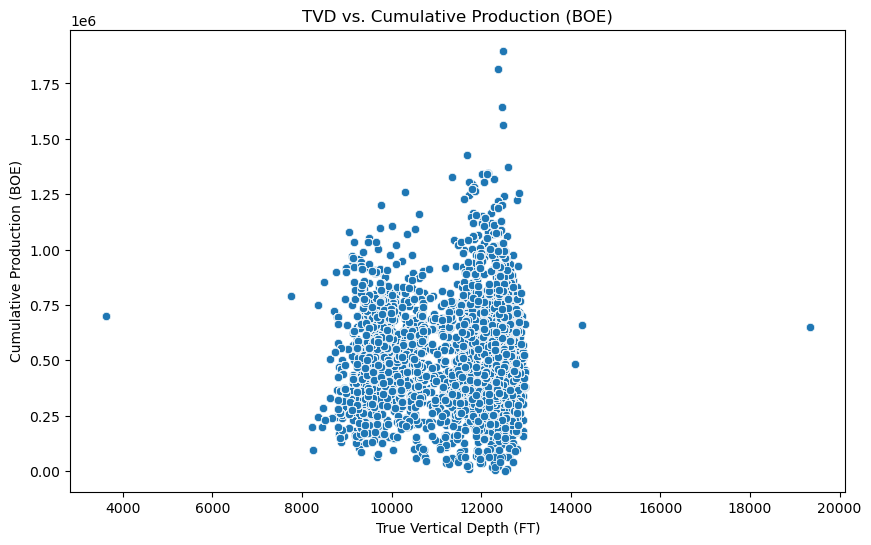

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TVD_FT', y='CumProd_BOE', data=merged_df)
plt.title('TVD vs. Cumulative Production (BOE)')
plt.xlabel('True Vertical Depth (FT)')
plt.ylabel('Cumulative Production (BOE)')
plt.show()

### 8. Lateral Length vs. Cumulative Production (BOE)
This graph delves into the impact of lateral length on cumulative production, challenging the assumption that longer laterals always lead to higher production volumes. The variability in production outcomes within common lateral length ranges suggests that other factors, including geological properties and completion techniques, significantly influence productivity.


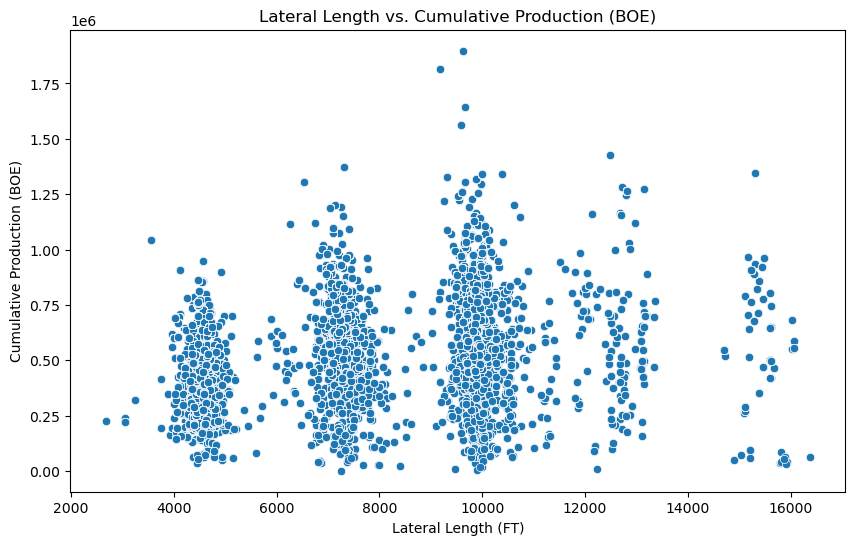

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LateralLength_FT', y='CumProd_BOE', data=merged_df)
plt.title('Lateral Length vs. Cumulative Production (BOE)')
plt.xlabel('Lateral Length (FT)')
plt.ylabel('Cumulative Production (BOE)')
plt.show()

# 6. Problem Solving

## 6.1. Business Problem 1: Optimizing Well Performance through Geological Formation Analysis


In the quest to enhance well performance, the analysis of geological formations stands out as a pivotal area of focus. Our objective here is to dissect how distinct geological formations exert influence over well productivity and the selection of operational strategies. To unravel this, we embark on a detailed examination of average cumulative production and time to peak production, juxtaposing these findings against a backdrop of operational parameters unique to each geological formation. By doing so, we aim to unearth actionable insights that can guide the optimization of well performance in varying geological contexts.

### a) Analyzing Average Cumulative Production and Time to Peak Production by Geological Formation

To begin, we aggregate the production data by geological formation to calculate the average cumulative production in both Barrels of Oil Equivalent (BOE) and Thousands of Cubic Feet of Gas Equivalent (MCFE), as well as the average time to peak production. This analysis helps identify which formations are more productive and efficient.


In [21]:
# Analyze average cumulative production and time to peak production by geological formation
formation_performance = merged_df.groupby('ENVInterval').agg(
    Average_CumProd_BOE=('CumProd_BOE', 'mean'),
    Average_CumProd_MCFE=('CumProd_MCFE', 'mean'),
    Average_MonthsToPeakProduction=('MonthsToPeakProduction', 'mean')
).reset_index()

# Display the results
print(formation_performance)

        ENVInterval  Average_CumProd_BOE  Average_CumProd_MCFE  \
0  WOLFCAMP A LOWER        548654.542462          2.262822e+06   
1  WOLFCAMP A UPPER        553289.438610          2.300025e+06   
2       WOLFCAMP XY        565201.774901          2.372195e+06   

   Average_MonthsToPeakProduction  
0                        2.292805  
1                        2.312974  
2                        2.150799  


### b) Operational Parameters by Geological Formation

Next, we examine the operational parameters, such as True Vertical Depth (TVD), lateral length, number of fracturing stages, volume of proppant used, and total water pumped, averaged across each geological formation. This step is crucial for understanding how operational decisions correlate with production outcomes.


In [22]:
# Analyzing operational parameters by geological formation
operational_params_by_formation = merged_df.groupby('ENVInterval').agg(
    Average_TVD=('TVD_FT', 'mean'),
    Average_LateralLength_FT=('LateralLength_FT', 'mean'),
    Average_FracStages=('FracStages', 'mean'),
    Average_Proppant_LBS=('Proppant_LBS', 'mean'),
    Average_TotalWaterPumped_GAL=('TotalWaterPumped_GAL', 'mean')
).reset_index()

# Display the results
print(operational_params_by_formation)

        ENVInterval   Average_TVD  Average_LateralLength_FT  \
0  WOLFCAMP A LOWER  11580.220890               7348.709943   
1  WOLFCAMP A UPPER  11518.408902               7153.036798   
2       WOLFCAMP XY  11241.565785               7051.038354   

   Average_FracStages  Average_Proppant_LBS  Average_TotalWaterPumped_GAL  
0           31.797296          1.730197e+07                  1.501100e+07  
1           29.684434          1.695910e+07                  1.380738e+07  
2           31.531654          1.634278e+07                  1.302581e+07  


### c) Correlation between Well Depth Characteristics and Production Metrics

We also explore the relationship between well depth characteristics (TVD and Lateral Length) and production metrics (Cumulative Production in BOE and MCFE) through correlation analysis. This helps in understanding how physical well attributes impact production volumes.


In [23]:
# Analyze correlation between well depth characteristics (TVD, LateralLength) and production metrics
depth_production_correlation = merged_df[['TVD_FT', 'LateralLength_FT', 'CumProd_BOE', 'CumProd_MCFE']].corr()

# Display the correlation matrix
print(depth_production_correlation)


                    TVD_FT  LateralLength_FT  CumProd_BOE  CumProd_MCFE
TVD_FT            1.000000         -0.027521     0.061033      0.066683
LateralLength_FT -0.027521          1.000000     0.453073      0.294951
CumProd_BOE       0.061033          0.453073     1.000000      0.727359
CumProd_MCFE      0.066683          0.294951     0.727359      1.000000


### d) Visualizing the Analysis

To visually represent our findings, several plots are generated:
- A bar chart showing the average cumulative production (BOE) by geological formation highlights which formations are most productive on average.
- Another bar chart compares the average months to peak production across formations, indicating efficiency in reaching peak productivity.
- A bar chart illustrating the average lateral length by formation sheds light on operational practices.
- A last bar chart showing the average vertical depth by formation 
- Lastly, a heatmap of the correlation matrix provides insight into the relationships between well depth characteristics and production metrics.


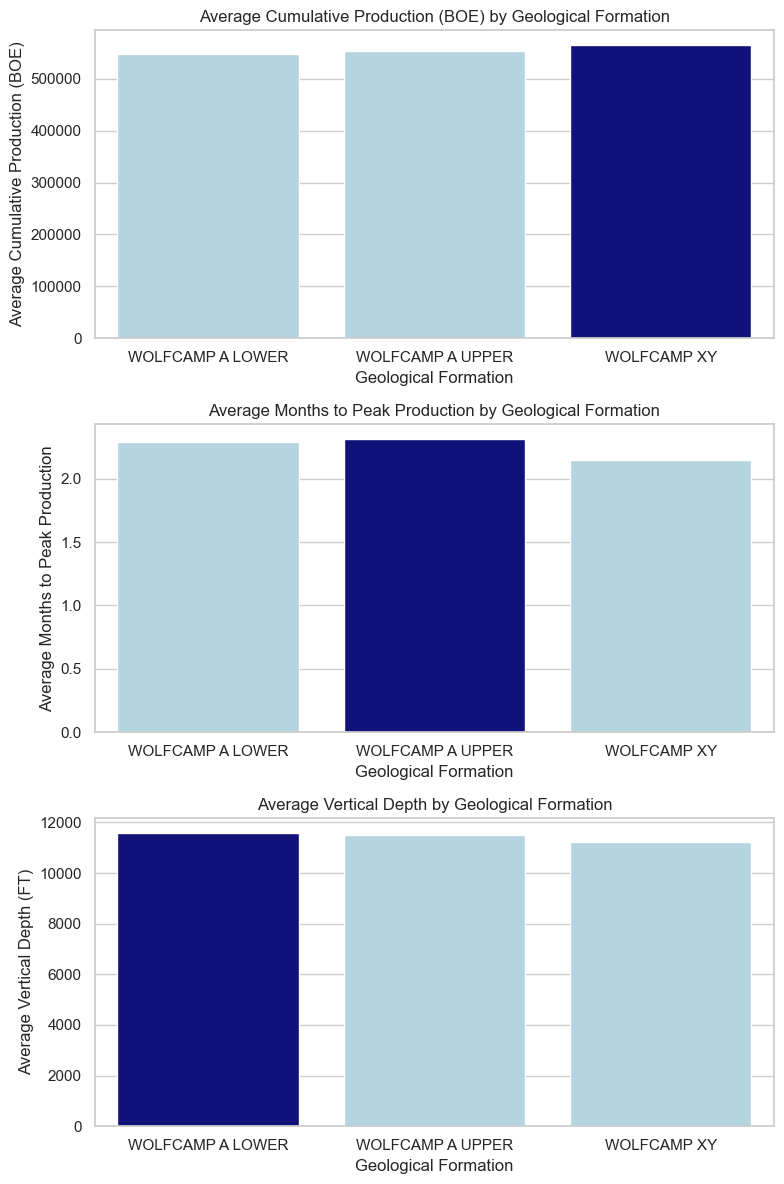

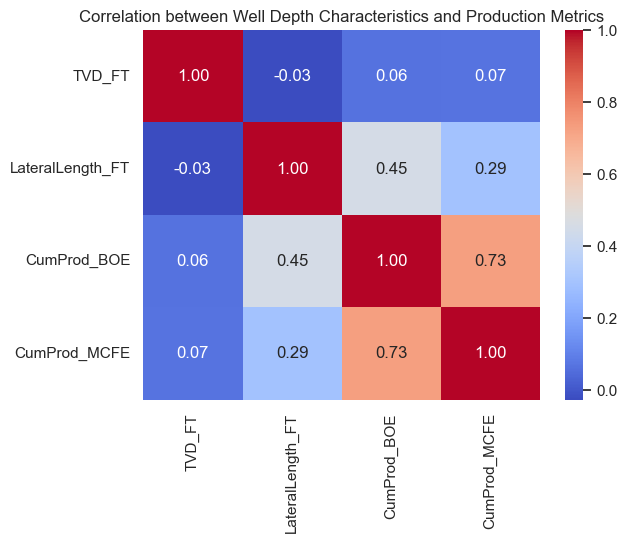

In [24]:
# Define a function to highlight the highest bar
def highlight_highest_bar(data, feature):
    max_value = data[feature].max()
    colors = []
    for val in data[feature]:
        if val == max_value:
            colors.append('darkblue')  # Darker shade for the highest value
        else:
            colors.append('lightblue')  # Lighter shade for others
    return colors

# Start plotting
sns.set(style="whitegrid")
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Define colors for each formation
color_map = {
    'WOLFCAMP A LOWER': 'red',
    'WOLFCAMP A UPPER': 'green',
    'WOLFCAMP XY': 'blue'
}

# Plot 1: Average Cumulative Production
colors = highlight_highest_bar(formation_performance, 'Average_CumProd_BOE')
sns.barplot(x='ENVInterval', y='Average_CumProd_BOE', data=formation_performance, ax=ax[0], palette=colors)
ax[0].set_title('Average Cumulative Production (BOE) by Geological Formation')
ax[0].set_xlabel('Geological Formation')
ax[0].set_ylabel('Average Cumulative Production (BOE)')

# Plot 2: Average Months to Peak Production
colors = highlight_highest_bar(formation_performance, 'Average_MonthsToPeakProduction')
sns.barplot(x='ENVInterval', y='Average_MonthsToPeakProduction', data=formation_performance, ax=ax[1], palette=colors)
ax[1].set_title('Average Months to Peak Production by Geological Formation')
ax[1].set_xlabel('Geological Formation')
ax[1].set_ylabel('Average Months to Peak Production')

# Plot 3: Average Lateral Length
colors = highlight_highest_bar(operational_params_by_formation, 'Average_LateralLength_FT')
sns.barplot(x='ENVInterval', y='Average_LateralLength_FT', data=operational_params_by_formation, ax=ax[2], palette=colors)
ax[2].set_title('Average Lateral Length by Geological Formation')
ax[2].set_xlabel('Geological Formation')
ax[2].set_ylabel('Average Lateral Length (FT)')

# Plot 3: Average Lateral Length
colors = highlight_highest_bar(operational_params_by_formation, 'Average_TVD')
sns.barplot(x='ENVInterval', y='Average_TVD', data=operational_params_by_formation, ax=ax[2], palette=colors)
ax[2].set_title('Average Vertical Depth by Geological Formation')
ax[2].set_xlabel('Geological Formation')
ax[2].set_ylabel('Average Vertical Depth (FT)')

plt.tight_layout()
plt.show()

sns.heatmap(depth_production_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Well Depth Characteristics and Production Metrics')
plt.show()


## 6.2. Business Problem 2: Enhancing Forecasting Accuracy through Spatial and Temporal Production Trends

With the goal of refining production forecasting, our attention shifts to the spatial and temporal dynamics of well production. The strategy involves clustering wells based on their geographical positioning to delve into the production metrics and operational parameters characterizing each cluster. The heart of this analysis lies in pinpointing patterns and trends that could elevate the precision of production forecasts. By leveraging geographical insights alongside temporal production data, we aspire to sculpt forecasting models that embody a higher degree of accuracy and reliability in predicting future production volumes and operational needs.





### a) Clustering Wells Based on Geographical Coordinates and Visualzing it on a map of New Mexico

The first step in our analysis involves clustering wells to understand spatial patterns in production. We use the KMeans clustering algorithm, which groups wells into clusters based on their geographical locations (latitude and longitude). This approach helps us to identify areas with similar production characteristics. These clusters where than overlaid on a State Map of New Mexico, to give you an understanding where our clusters are located geographically. 



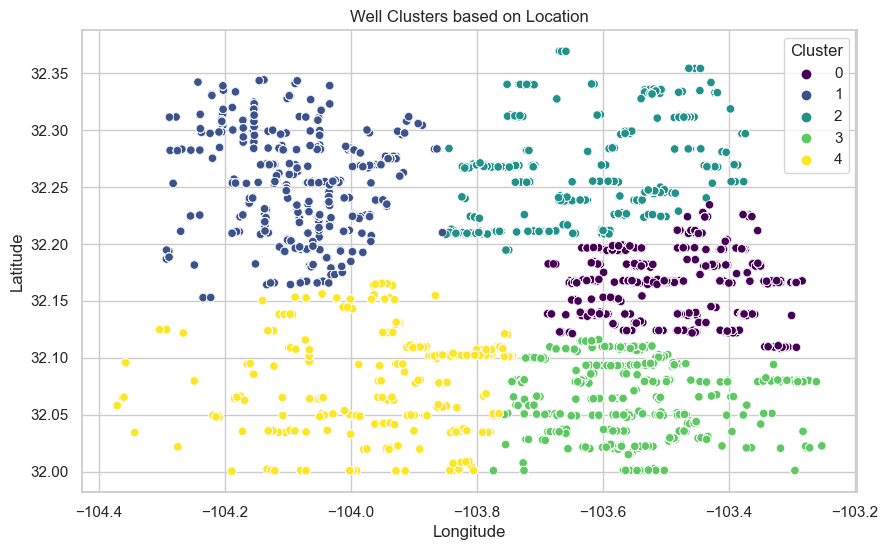

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns  # For a nicer plotting interface

# Assuming 'merged_df' is loaded with latitude and longitude
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(merged_df[['Latitude', 'Longitude']])

kmeans = KMeans(n_clusters=5, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(coords_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Longitude'], y=merged_df['Latitude'], hue=merged_df['Cluster'], palette='viridis', legend="full")
plt.title('Well Clusters based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()


## Well Clusters Overlaid on New Mexico: PNG Visualization

Due to technical constraints and to ensure universal accessibility, we present our analysis of well clusters in New Mexico as a static PNG image. This approach bypasses the need for running geospatial code or handling shapefiles, making it easier for all viewers to see our findings without setup complexities.

This is how i intially did it:

#### Step 1: Load the New Mexico shapefile
- nm_shapefile_path = '/Users/kian/Downloads/tl_2019_35_prisecroads/tl_2019_35_prisecroads.shi'
- nm_map = gpd.read_file(nm_shapefile_path)

#### Step 2: Prepare your well data as a GeoDataFrame
- from shapely.geometry import Point

#### Step 3: Assuming 'merged_df' is already loaded with 'Latitude', 'Longitude', and 'Cluster'
- gdf_wells = gpd.GeoDataFrame(merged_df, geometry=[Point(xy) for xy in zip(merged_df.Longitude, merged_df.Latitude)])
- gdf_wells.crs = nm_map.crs  # Ensure CRS matches the map for accurate overlay

#### Step 4: Plot the map and clusters
- fig, ax = plt.subplots(figsize=(10, 10))
- nm_map.plot(ax=ax, color='lightgrey')  # Plot NM map
- gdf_wells.plot(ax=ax, column='Cluster', cmap='viridis', markersize=50, legend=True)  # Plot wells
- plt.title('Well Clusters Overlaid on New Mexico and Its Counties')
- plt.show()


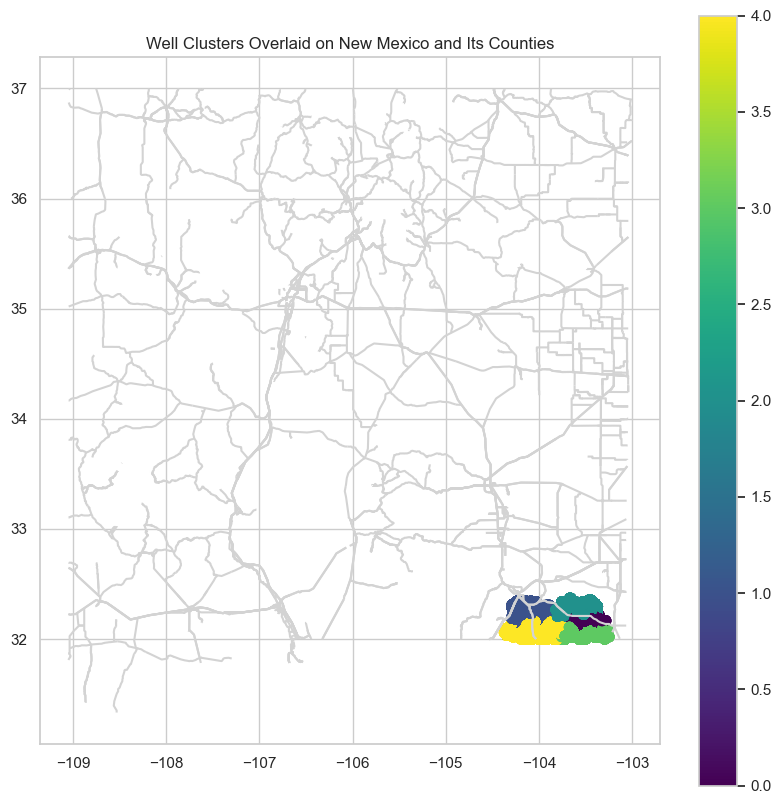

### b) Analyzing Production Metrics and Operational Parameters per Cluster
After clustering, we aggregate production metrics and operational parameters for each cluster. This analysis reveals differences in well productivity and operational practices across the clusters, providing insights into how location influences production outcomes.



In [26]:
# Group by 'Cluster' and calculate average metrics
cluster_metrics = merged_df.groupby('Cluster').agg({
    'CumProd_BOE': 'mean',
    'CumProd_MCFE': 'mean',
    'TotalProdMonths': 'mean',
    'LateralLength_FT': 'mean',
    'FracStages': 'mean',
    'Proppant_LBS': 'mean',
    'TotalWaterPumped_GAL': 'mean'
}).reset_index()

# Display the aggregated metrics for each cluster
print(cluster_metrics)

   Cluster    CumProd_BOE  CumProd_MCFE  TotalProdMonths  LateralLength_FT  \
0        0  499759.322242  2.110203e+06        25.501127       7072.007144   
1        1  502050.658229  2.076193e+06        28.238658       6789.918552   
2        2  591993.072173  2.459538e+06        24.837314       7560.193744   
3        3  585331.165547  2.461899e+06        30.128392       6766.903108   
4        4  611793.673687  2.470611e+06        22.672550       8331.613258   

   FracStages  Proppant_LBS  TotalWaterPumped_GAL  
0   28.044829  1.667327e+07          1.304605e+07  
1   33.548517  1.627020e+07          1.342444e+07  
2   31.723286  1.738020e+07          1.385137e+07  
3   26.673171  1.622219e+07          1.347492e+07  
4   37.454230  1.887428e+07          1.677837e+07  


### c) Visualizing the Results

To visually interpret our findings, we create several plots:

- A bar chart of the average cumulative production (BOE) by cluster helps us identify which clusters are most productive.
- Plots of a few of the operational parameters, including lateral length and frac stages, to understand operational differences across clusters.

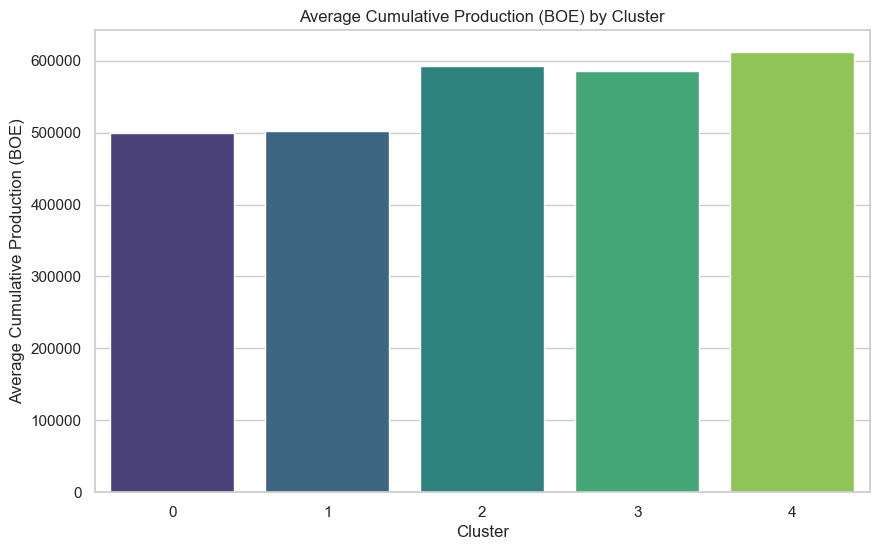

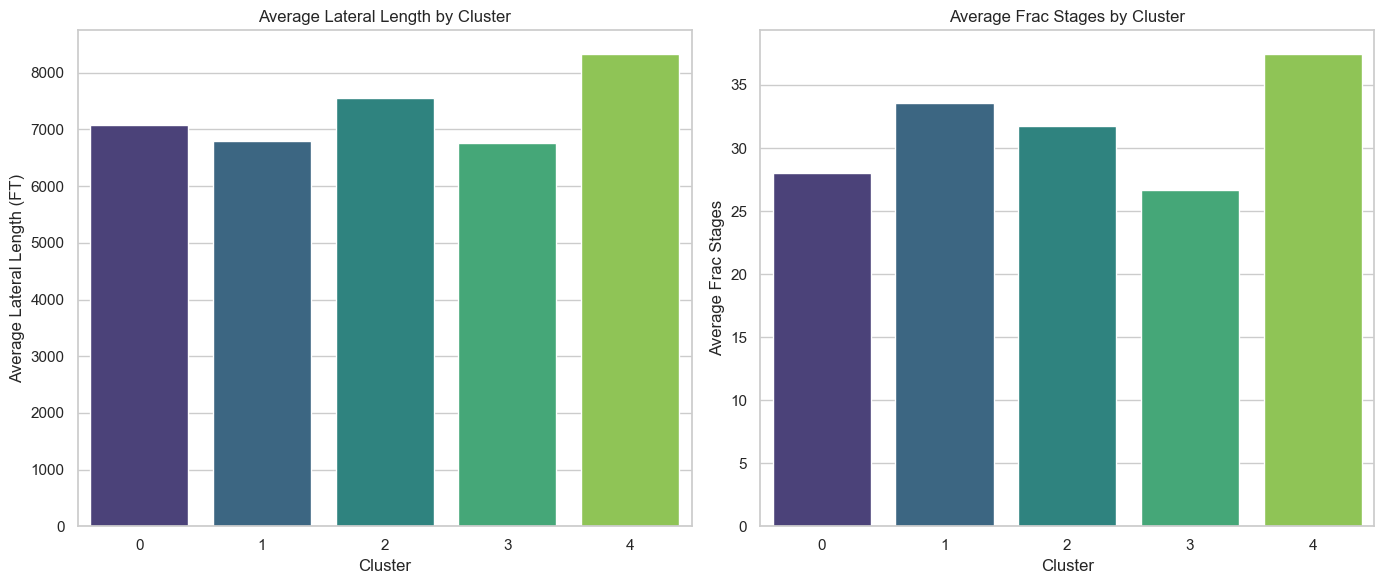

In [27]:
# Calculate average production metrics and operational parameters per cluster
production_by_cluster = merged_df.groupby('Cluster').agg({
    'CumProd_BOE': 'mean',
    'CumProd_MCFE': 'mean',
    'LateralLength_FT': 'mean',
    'FracStages': 'mean',
    'Proppant_LBS': 'mean',
    'TotalWaterPumped_GAL': 'mean'
}).reset_index()

# Visualize the average cumulative production (BOE) by cluster
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='CumProd_BOE', data=production_by_cluster, palette='viridis')
plt.title('Average Cumulative Production (BOE) by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Cumulative Production (BOE)')
plt.show()

# Visualize operational parameters by cluster
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Cluster', y='LateralLength_FT', data=production_by_cluster, palette='viridis')
plt.title('Average Lateral Length by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Lateral Length (FT)')

plt.subplot(1, 2, 2)
sns.barplot(x='Cluster', y='FracStages', data=production_by_cluster, palette='viridis')
plt.title('Average Frac Stages by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Frac Stages')

plt.tight_layout()
plt.show()


### d) Installation of the New Mexico State Map

In [28]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.
